# Data Dive
### Karson Woods, Osman Ali, and Antonio Levarity

## Member Contributions

- We discussed every step together with Karson typing out the code. 

## Hypotheses

- What variables are best used to predict sales price based off VIF Factor and their p-values? 
- Does highway and city fuel economy have a high VIF factor considering they are closely related?
- Is there a positive correlation between year and sale price of a car? 

## Section 1: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row', 200)

plt.style.use('seaborn')

## Section 2: Import Data

In [2]:
df_CarSalesOriginal = pd.read_csv('data/CarSales_DataDive.csv', header = 0, index_col = 0, low_memory = False)
df_CarSalesOriginal.info(float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215646 entries, 273335 to 119691
Data columns (total 48 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   city                     206239 non-null  object 
 1   bed                      1575 non-null    object 
 2   body_type                205308 non-null  object 
 3   city_fuel_economy        173883 non-null  float64
 4   combine_fuel_economy     0 non-null       float64
 5   daysonmarket             206239 non-null  float64
 6   dealer_zip               206239 non-null  float64
 7   engine_cylinders         199075 non-null  float64
 8   engine_displacement      194191 non-null  float64
 9   engine_type              199075 non-null  object 
 10  exterior_color           206234 non-null  object 
 11  frame_damaged            111298 non-null  object 
 12  franchise_dealer         206239 non-null  object 
 13  franchise_make           152719 non-null  object 
 14 

## Section 3: Cleaning Data

### Section 3a: Dropping Uncessary Variables

In [3]:
df_CarSales = df_CarSalesOriginal.copy(deep = True)
df_CarSales.info(float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215646 entries, 273335 to 119691
Data columns (total 48 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   city                     206239 non-null  object 
 1   bed                      1575 non-null    object 
 2   body_type                205308 non-null  object 
 3   city_fuel_economy        173883 non-null  float64
 4   combine_fuel_economy     0 non-null       float64
 5   daysonmarket             206239 non-null  float64
 6   dealer_zip               206239 non-null  float64
 7   engine_cylinders         199075 non-null  float64
 8   engine_displacement      194191 non-null  float64
 9   engine_type              199075 non-null  object 
 10  exterior_color           206234 non-null  object 
 11  frame_damaged            111298 non-null  object 
 12  franchise_dealer         206239 non-null  object 
 13  franchise_make           152719 non-null  object 
 14 

In [4]:
df_CarSales = df_CarSales.drop(columns=['combine_fuel_economy', 'dealer_zip', 'vehicle_damage_category', \
                                        'latitude', 'longitude', 'main_picture_url', 'listing_id', 'listed_date', 'bed'])
df_CarSales = df_CarSales.drop(df_CarSales.index[206241:215646], axis = 0)
df_CarSales.info(float)
#Checking to ensure columns were dropped. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206241 entries, 273335 to 142824
Data columns (total 39 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   city                  206239 non-null  object 
 1   body_type             205308 non-null  object 
 2   city_fuel_economy     173883 non-null  float64
 3   daysonmarket          206239 non-null  float64
 4   engine_cylinders      199075 non-null  float64
 5   engine_displacement   194191 non-null  float64
 6   engine_type           199075 non-null  object 
 7   exterior_color        206234 non-null  object 
 8   frame_damaged         111298 non-null  object 
 9   franchise_dealer      206239 non-null  object 
 10  franchise_make        152719 non-null  object 
 11  front_legroom         195319 non-null  object 
 12  fuel_tank_volume      195228 non-null  float64
 13  fuel_type             200380 non-null  object 
 14  has_accidents         111298 non-null  object 


In [5]:
df_CarSales = df_CarSales.drop(df_CarSales.index[206241:215646], axis = 0)
df_CarSales.info(float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206241 entries, 273335 to 142824
Data columns (total 39 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   city                  206239 non-null  object 
 1   body_type             205308 non-null  object 
 2   city_fuel_economy     173883 non-null  float64
 3   daysonmarket          206239 non-null  float64
 4   engine_cylinders      199075 non-null  float64
 5   engine_displacement   194191 non-null  float64
 6   engine_type           199075 non-null  object 
 7   exterior_color        206234 non-null  object 
 8   frame_damaged         111298 non-null  object 
 9   franchise_dealer      206239 non-null  object 
 10  franchise_make        152719 non-null  object 
 11  front_legroom         195319 non-null  object 
 12  fuel_tank_volume      195228 non-null  float64
 13  fuel_type             200380 non-null  object 
 14  has_accidents         111298 non-null  object 


- Dropped combine_fuel_economy, dealer_zip, vehicle_damage_category, latitude, longitude, main_picture_url, listing_id, and listed_date as we believe these variables weren't relevant to the analysis we were performing. As well, the data was incomplete and it wouldn't make sense to estimate the missing values based off the information we had available. 

- Dropped rows 206241 - 215646 as they contained no relevant data for our analysis. 

- NaN values need to be filled in for frame_damaged, franchise_make, fuel_tank_volume, has_accidents, highway_fuel_economy, horsepower, maximum_seating, owner_count, salvage, theft_title, torque, and wheel_system_display.

In [6]:
df_CarSales.groupby('year')['year'].count()

year
1923.0        2
1926.0        3
1928.0        2
1929.0        1
1930.0        3
1931.0        1
1939.0        1
1948.0        1
1949.0        1
1950.0        3
1951.0        2
1952.0        1
1953.0        1
1954.0        4
1955.0        4
1956.0        1
1957.0       10
1958.0        3
1959.0        1
1960.0        2
1961.0        6
1962.0        3
1963.0       10
1964.0        4
1965.0        8
1966.0       14
1967.0       11
1968.0        7
1969.0       12
1970.0       12
1971.0        6
1972.0       10
1973.0        8
1974.0        8
1975.0        8
1976.0        7
1977.0        5
1978.0        9
1979.0       11
1980.0        7
1981.0        7
1982.0        7
1983.0        6
1984.0       12
1985.0       10
1986.0       14
1987.0       18
1988.0       14
1989.0       19
1990.0       10
1991.0       21
1992.0       18
1993.0       20
1994.0       31
1995.0       31
1996.0       40
1997.0       63
1998.0       75
1999.0      124
2000.0      179
2001.0      250
2002.0      363
200

In [7]:
df_CarSales.sort_values(by = ['year'], ascending = True)

city        body_type  city_fuel_economy  daysonmarket  \
321675      El Paso      Convertible                NaN          14.0   
288323  Springfield      Convertible                NaN          92.0   
93636         Miami              NaN                NaN         177.0   
93631         Miami              NaN                NaN         204.0   
93488         Miami              NaN                NaN         235.0   
...             ...              ...                ...           ...   
157057      Phoenix            Sedan                NaN           6.0   
103677        Miami  SUV / Crossover               20.0           0.0   
67019   San Antonio  SUV / Crossover                NaN          13.0   
173354          NaN              NaN                NaN           NaN   
142824          NaN              NaN                NaN           NaN   

        engine_cylinders  engine_displacement engine_type  \
321675               NaN                  NaN         NaN   
288323               NaN                  NaN         NaN   
93636                NaN                  NaN         NaN   
93631                NaN                  NaN         NaN   
93488                NaN                  NaN         NaN   
...                  ...                  ...         ...   
157057               NaN                  NaN         NaN   
103677               6.0               3500.0          V6   
67019                4.0                  NaN   I4 Hybrid   
173354               NaN                  NaN         NaN   
142824               NaN                  NaN         NaN   

               exterior_color frame_damaged franchise_dealer franchise_make  \
321675                  Black         False            False            NaN   
288323                    RED         False            False            NaN   
93636                    None         False            False            NaN   
93631         Burgundy/Maroon         False            False            NaN   
93488                   Black         False            False            NaN   
...                       ...           ...              ...            ...   
157057            Clear White           NaN             True            Kia   
103677   Platinum White Pearl           NaN             True          Honda   
67019   Coastal Gray Metallic           NaN             True         Toyota   
173354                    NaN           NaN              NaN            NaN   
142824                    NaN           NaN              NaN            NaN   

       front_legroom  fuel_tank_volume fuel_type has_accidents  height  \
321675           NaN               NaN       NaN         False     NaN   
288323           NaN               NaN       NaN         False     NaN   
93636            NaN               NaN       NaN         False     NaN   
93631            NaN               NaN       NaN         False     NaN   
93488            NaN               NaN       NaN         False     NaN   
...              ...               ...       ...           ...     ...   
157057           NaN               NaN       NaN           NaN     NaN   
103677       40.9 in              19.5  Gasoline           NaN    70.6   
67019            NaN               NaN    Hybrid           NaN     NaN   
173354           NaN               NaN       NaN           NaN     NaN   
142824           NaN               NaN       NaN           NaN     NaN   

        highway_fuel_economy  horsepower interior_color is_new  length  \
321675                   NaN         NaN          Black  False     NaN   
288323                   NaN         NaN           None  False     NaN   
93636                    NaN         NaN           None  False     NaN   
93631                    NaN         NaN          Black  False     NaN   
93488                    NaN         NaN          Black  False     NaN   
...                      ...         ...            ...    ...     ...   
157057                   NaN         NaN         

In [8]:
#df_CarSales[df_CarSales['year']<2000].shape

In [9]:
df_CarYear_Over_2000 = df_CarSales[df_CarSales['year']>1999]
#df_CarYear_Over_2000.info(float)

- Filtered for cars by year to identify vehicles with an excessive amount of NaN variables. For the cars with an excessive amount of NaN variables, we dropped these from our data set as it woudn't be logical for us to estimate these missing variables as we would be modifying the data too much to fit our perceptions.  

- We dropped cars earlier than year 2000 as we're assuming the average consumer is likely to not buy a car earlier than that. 

### Section 3b: Scatterplot of Car Sales to Identify Outliers in Terms of Sale Price

Text(0, 0.5, 'Year')

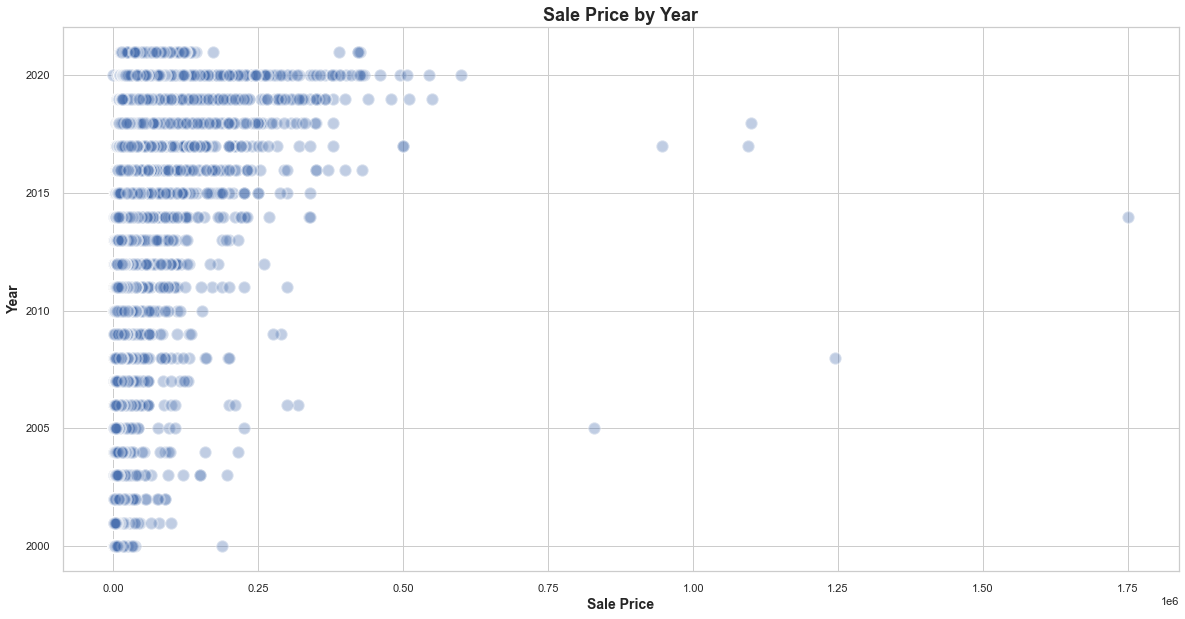

In [10]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'price', y = 'year', data = df_CarYear_Over_2000, alpha = 0.35, s = 150, edgecolor = 'white', linewidth = 2)
plt.title('Sale Price by Year', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('Sale Price', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Year', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')

In [11]:
df_CarYear_Over_2000 = df_CarYear_Over_2000[df_CarYear_Over_2000['price']<200000]

- We dropped the data for cars over 200,000 dollars as the average consumer is unlikely to be able to afford cars in this range. 

### Section 3c: Filling in NaN Values

In [12]:
#df_CarYear_Over_2000.head(50)

In [13]:
#df_CarYear_Over_2000[['salvage']].value_counts()

In [14]:
#df_CarYear_Over_2000[['has_accidents']].value_counts()

In [15]:
#df_CarYear_Over_2000[['body_type']].value_counts()

In [16]:
#df_CarYear_Over_2000[['daysonmarket']].value_counts()

In [17]:
#df_CarYear_Over_2000[['body_type']].value_counts()

In [18]:
#df_CarYear_Over_2000[['transmission_display']].value_counts()

In [19]:
#df_CarYear_Over_2000[['wheel_system_display']].value_counts()

In [20]:
#df_CarYear_Over_2000[['interior_color']].value_counts()

- Used the value_counts function to identify which columns had missing data.

In [21]:
df_CarYear_Over_2000['mileage'] = df_CarYear_Over_2000['mileage'].fillna(0)
df_CarYear_Over_2000['owner_count'] = df_CarYear_Over_2000['owner_count'].fillna(0)
df_CarYear_Over_2000['theft_title'] = df_CarYear_Over_2000['theft_title'].fillna(False)
df_CarYear_Over_2000['salvage'] = df_CarYear_Over_2000['salvage'].fillna(False)
df_CarYear_Over_2000['has_accidents'] = df_CarYear_Over_2000['has_accidents'].fillna(False)
df_CarYear_Over_2000['engine_cylinders'] = df_CarYear_Over_2000['engine_cylinders'].fillna(4)
df_CarYear_Over_2000['maximum_seating'] = df_CarYear_Over_2000['maximum_seating'].fillna(4)
df_CarYear_Over_2000['frame_damaged'] = df_CarYear_Over_2000['frame_damaged'].fillna(False)
df_CarYear_Over_2000['body_type'] = df_CarYear_Over_2000['body_type'].fillna('Unknown')
df_CarYear_Over_2000['transmission_display'] = df_CarYear_Over_2000['transmission_display'].fillna('Automatic')
df_CarYear_Over_2000['wheel_system_display'] = df_CarYear_Over_2000['wheel_system_display'].fillna('Front-Wheel Drive')
df_CarYear_Over_2000['fuel_type'] = df_CarYear_Over_2000['fuel_type'].fillna('Gasoline')
df_CarYear_Over_2000['interior_color'] = df_CarYear_Over_2000['interior_color'].fillna('Black')
#df_CarYear_Over_2000.head(15)

In [22]:
df_CarYear_Over_2000['fuel_tank_volume'] = df_CarYear_Over_2000['fuel_tank_volume'].fillna(df_CarYear_Over_2000['fuel_tank_volume'].mean())
df_CarYear_Over_2000['city_fuel_economy'] = df_CarYear_Over_2000['city_fuel_economy'].fillna(df_CarYear_Over_2000['city_fuel_economy'].mean())
df_CarYear_Over_2000['highway_fuel_economy'] = df_CarYear_Over_2000['highway_fuel_economy'].fillna(df_CarYear_Over_2000['highway_fuel_economy'].mean())
df_CarYear_Over_2000['horsepower'] = df_CarYear_Over_2000['horsepower'].fillna(df_CarYear_Over_2000['horsepower'].mean())
df_CarYear_Over_2000['torque'] = df_CarYear_Over_2000['torque'].fillna(df_CarYear_Over_2000['torque'].mean())
df_CarYear_Over_2000['seller_rating'] = df_CarYear_Over_2000['seller_rating'].fillna(df_CarYear_Over_2000['seller_rating'].mean())
#df_CarYear_Over_2000.head(15)

- For some missing variables, based off what the most common option was, we filled in the missing values with the most predominant option with some cases it being "False" and other cases it being 0. As well, we estimated other missing variables using the mean function.

## Section 4: Simple Regression of Year and Price

In [23]:
X = df_CarYear_Over_2000['year']
y = df_CarYear_Over_2000['price']

X = sm.add_constant(X)

reg5 = sm.OLS(y, X).fit()

pred5 = reg5.predict(X)

resid5 = reg5.resid

reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                 6.012e+04
Date:                Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:55:31   Log-Likelihood:            -2.2708e+06
No. Observations:              205248   AIC:                         4.542e+06
Df Residuals:                  205246   BIC:                         4.542e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.635e+06    1.9e+04   -243.679      0.000   -4.67e+06    -4.6e+06
year        2311.2891      9.426    245.198      0.000    2292.814    2329.764
==============================================================================
Omnibus:                   129345.662   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2361383.168
Skew:                           2.740   Prob(JB):                         0.00
Kurtosis:                      18.687   Cond. No.                     1.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
df_reg5 = df_CarYear_Over_2000[['year', 'price']]
df_reg5 = pd.concat([df_reg5, pred5, resid5], axis = 1)
df_reg5 = df_reg5.rename(columns = {0 : 'Sale Price Predicted', 1 : 'Residual'})

Text(0, 0.5, 'Sale Price')

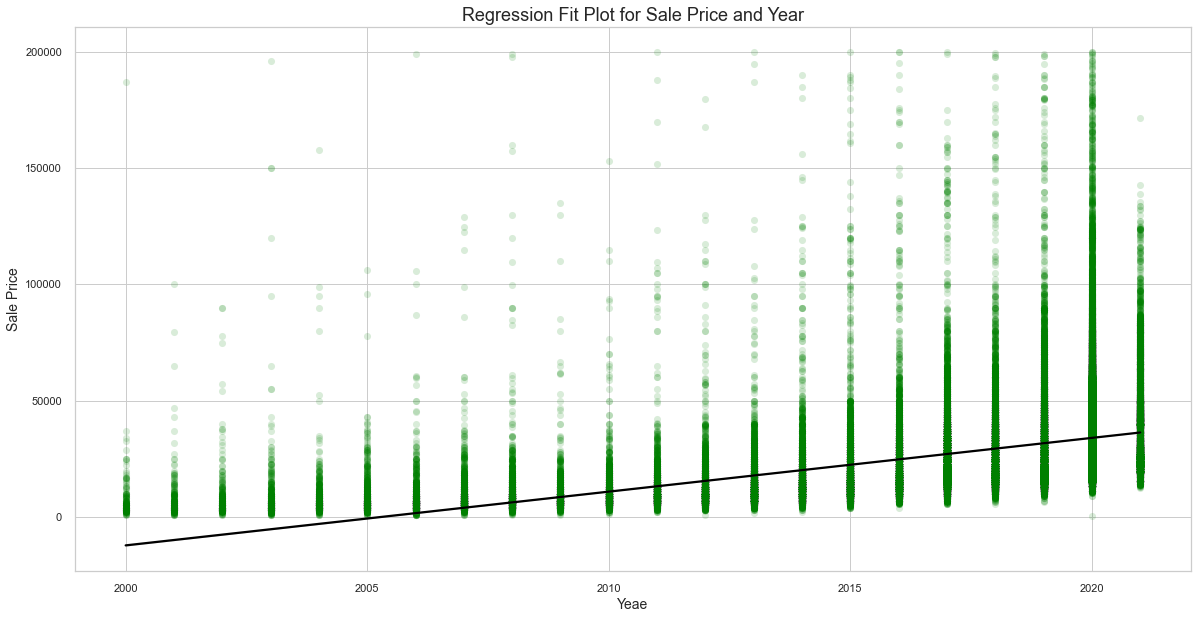

In [25]:
plt.figure(figsize=(20,10))
sns.regplot(x = 'year', y = 'price', data = df_reg5, scatter_kws = {"color":"green","alpha":0.15,"s":50}, line_kws = {'color':'black'})
plt.title('Regression Fit Plot for Sale Price and Year', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('Yeae', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Sale Price', fontsize = '14', horizontalalignment = 'center')

- From our regression model and plot, we can see a positive correlation between year and price of a car. 

## Section 5: Multiple Regressions, Residual Plots, and Heatmap for Price

In [26]:
X = df_CarYear_Over_2000[['city_fuel_economy', 'year', 'highway_fuel_economy', 'mileage', 'owner_count', 'savings_amount', 'maximum_seating', 'fuel_tank_volume', 'engine_cylinders', 'daysonmarket', 'horsepower', 'torque', 'seller_rating']]

y = df_CarYear_Over_2000['price']

In [27]:
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()

pred = reg.predict(X)

resid = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                 2.739e+04
Date:                Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:55:48   Log-Likelihood:            -2.1939e+06
No. Observations:              205248   AIC:                         4.388e+06
Df Residuals:                  205234   BIC:                         4.388e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.284e+06   2.14e+04   -153.171      0.000   -3.33e+06   -3.24e+06
city_fuel_economy      488.4767      8.748     55.836      0.000     471.330     505.624
year                  1628.0047     10.613    153.403      0.000    1607.204    1648.805
highway_fuel_economy  -538.4261     10.370    -51.923      0.000    -558.750    -518.102
mileage                 -0.0009      0.000     -8.861      0.000      -0.001      -0.001
owner_count          -2696.7472     36.190    -74.516      0.000   -2767.679   -2625.815
savings_amount           0.0676      0.025      2.725      0.006       0.019       0.116
maximum_seating       -864.6299     21.229    -40.730      0.000    -906.237    -823.022
fuel_tank_volume       -78.1220      7.852     -9.949      0.000     -93.513     -62.731
engine_cylinders      -907.5647     30.980    -29.295      0.000    -968.285    -846.845
daysonmarket             9.3484      0.226     41.447      0.000       8.906       9.790
horsepower             127.9038      0.614    208.162      0.000     126.700     129.108
torque                   9.2961      0.401     23.169      0.000       8.510      10.083
seller_rating         2698.8508     46.647     57.857      0.000    2607.424    2790.277
==============================================================================
Omnibus:                   142488.180   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5055913.620
Skew:                           2.897   Prob(JB):                         0.00
Kurtosis:                      26.614   Cond. No.                     2.08e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- From our initial regression model, we wanted to be able to identify the variables that are multicollinear by calculating the VIF Factor for these selected variables. 

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns 
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

VIF Factor              Features
0     837390.9                 const
3         10.4  highway_fuel_economy
1          9.4     city_fuel_economy
11         5.3            horsepower
9          3.6      engine_cylinders
12         3.3                torque
8          3.0      fuel_tank_volume
2          2.7                  year
5          2.7           owner_count
6          1.2        savings_amount
7          1.2       maximum_seating
4          1.0               mileage
10         1.0          daysonmarket
13         1.0         seller_rating

- From the VIF Factor for 'highway_fuel_economy' and 'city_fuel_economy', we can see that they are closely related to one another (multicollinear). We decided to engineer the 'fuel_economy' feature variable to account for this.

In [29]:
df_CarYear_Over_2000['fuel_economy'] = (df_CarYear_Over_2000['highway_fuel_economy'] + df_CarYear_Over_2000['city_fuel_economy']) / 2

In [30]:
X = df_CarYear_Over_2000[['year', 'fuel_economy', 'mileage', 'owner_count', 'savings_amount', 'maximum_seating', 'fuel_tank_volume', 'engine_cylinders', 'daysonmarket', 'horsepower', 'torque', 'seller_rating']]

y = df_CarYear_Over_2000['price']

X = sm.add_constant(X)

reg2 = sm.OLS(y, X).fit()

pred2 = reg2.predict(X)

resid2 = reg2.resid

reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                 2.900e+04
Date:                Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:55:49   Log-Likelihood:            -2.1954e+06
No. Observations:              205248   AIC:                         4.391e+06
Df Residuals:                  205235   BIC:                         4.391e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.222e+06   2.16e+04   -149.415      0.000   -3.26e+06   -3.18e+06
year              1593.5661     10.671    149.336      0.000    1572.651    1614.481
fuel_economy        40.5081      3.708     10.924      0.000      33.240      47.776
mileage             -0.0010      0.000     -8.994      0.000      -0.001      -0.001
owner_count      -2866.7099     36.319    -78.931      0.000   -2937.894   -2795.525
savings_amount       0.0401      0.025      1.607      0.108      -0.009       0.089
maximum_seating   -776.2985     21.321    -36.410      0.000    -818.087    -734.510
fuel_tank_volume   -52.0277      7.895     -6.590      0.000     -67.502     -36.554
engine_cylinders  -808.0422     31.152    -25.939      0.000    -869.099    -746.986
daysonmarket         9.5372      0.227     41.983      0.000       9.092       9.982
horsepower         128.0508      0.619    206.898      0.000     126.838     129.264
torque              10.7798      0.403     26.733      0.000       9.989      11.570
seller_rating     2728.1505     46.983     58.067      0.000    2636.065    2820.236
==============================================================================
Omnibus:                   140218.426   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4740378.163
Skew:                           2.844   Prob(JB):                         0.00
Kurtosis:                      25.846   Cond. No.                     2.08e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- In the second regression we decided to build a model based off some selected qualitative variables the we felt were important to the avarage consumer in the car market.

- From the regression output our R-squared is 0.629 which means 62.9% of the variability in Sale price of cars is being explained by the our selected feature varables. The p-values for our coefficients came out to be significant as well.

<Figure size 1440x720 with 0 Axes>

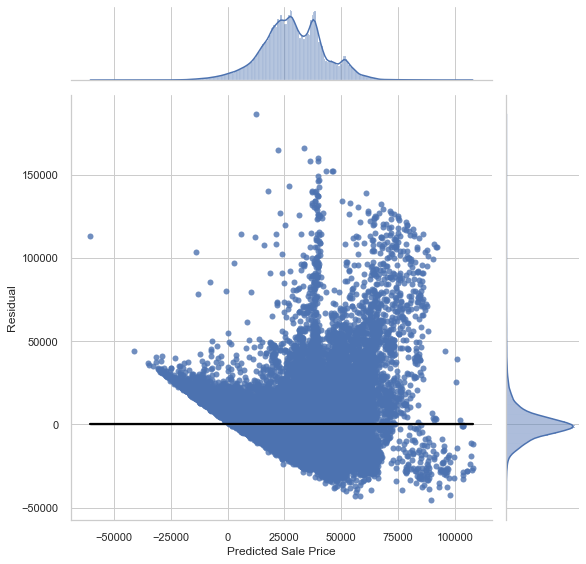

In [31]:
df_reg2 = df_CarYear_Over_2000[['year', 'fuel_economy', 'mileage', 'owner_count', 'savings_amount', 'maximum_seating', 'fuel_tank_volume', 'engine_cylinders', 'daysonmarket', 'horsepower', 'seller_rating']]

df_reg2 = pd.concat([df_reg2, pred2, resid2], axis = 1)
df_reg2 = df_reg2.rename(columns = {0 : 'Predicted Sale Price', 1 : 'Residual'})

plt.figure(figsize=(20,10))
sns.jointplot(x = 'Predicted Sale Price', y = 'Residual', kind = "reg", data = df_reg2, ratio = 5, height = 8, line_kws = {'color':'black'})

- Even though our model came out with the right outcomes, our residual plot does not look great as it shows some form of a pattern in the graph. That is to say, there is no constant variability in the residuals which means our model needs to modified to eliminate this pattern.

In [32]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns 
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

VIF Factor          Features
0     835078.0             const
10         5.3        horsepower
8          3.6  engine_cylinders
11         3.3            torque
7          3.0  fuel_tank_volume
1          2.7              year
4          2.6       owner_count
2          1.4      fuel_economy
5          1.2    savings_amount
6          1.2   maximum_seating
3          1.0           mileage
9          1.0      daysonmarket
12         1.0     seller_rating

In [33]:
dummies_bt = pd.get_dummies(df_CarYear_Over_2000['body_type'], prefix='bt', drop_first = False, dtype='int')
dummies_bt = dummies_bt.drop('bt_SUV / Crossover', axis = 1)

dummies_ft = pd.get_dummies(df_CarYear_Over_2000['fuel_type'], prefix='ft', drop_first = False, dtype='int')
dummies_ft = dummies_ft.drop('ft_Gasoline', axis = 1)

dummies_lc = pd.get_dummies(df_CarYear_Over_2000['listing_color'], prefix='lc', drop_first = False, dtype='int')
dummies_lc = dummies_lc.drop('lc_WHITE', axis = 1)

dummies_mk = pd.get_dummies(df_CarYear_Over_2000['make'],prefix='mk',drop_first = False,dtype='int')
dummies_mk = dummies_mk.drop('mk_Ford', axis = 1)

dummies_td = pd.get_dummies(df_CarYear_Over_2000['transmission_display'], prefix='td', drop_first = False, dtype='int')
dummies_td = dummies_td.drop('td_Automatic', axis = 1)

dummies_wsd = pd.get_dummies(df_CarYear_Over_2000['wheel_system_display'], prefix='wsd', drop_first = False, dtype='int')
dummies_wsd = dummies_wsd.drop('wsd_Front-Wheel Drive', axis = 1)

In [34]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

In [35]:
#df_CarYear_Over_2000['frame_damaged'].value_counts()

In [36]:
df_CarYear_Over_2000['frame_damaged'] = lc.fit_transform(df_CarYear_Over_2000['frame_damaged'])

df_CarYear_Over_2000['has_accidents'] = lc.fit_transform(df_CarYear_Over_2000['has_accidents'])

df_CarYear_Over_2000['is_new'] = lc.fit_transform(df_CarYear_Over_2000['is_new'])

df_CarYear_Over_2000['salvage'] = lc.fit_transform(df_CarYear_Over_2000['salvage'])

df_CarYear_Over_2000['theft_title'] = lc.fit_transform(df_CarYear_Over_2000['theft_title'])

- Encoding features to convert our categorical variables into a qualitative format so we can use this data in our analysis without losing the categorical qualities of these variables. 

In [37]:
#df_CarYear_Over_2000['salvage'].head()

In [38]:
df_CarYear_Over_2000 = pd.concat([df_CarYear_Over_2000, dummies_bt, dummies_ft, dummies_lc, dummies_mk, dummies_td, dummies_wsd], axis = 1)
#df_CarYear_Over_2000

In [39]:
X = df_CarYear_Over_2000[['year', 'fuel_economy', 'mileage', 'owner_count', 'savings_amount', 'maximum_seating', \
                          'fuel_tank_volume', 'engine_cylinders', 'daysonmarket', 'horsepower', 'torque', 'seller_rating', 'frame_damaged', \
                          'is_new', 'has_accidents', 'salvage', 'theft_title', 'bt_Convertible', 'bt_Coupe', \
                          'bt_Hatchback', 'bt_Minivan', 'bt_Pickup Truck', 'bt_Unknown', 'bt_Sedan', \
                          'bt_Van','bt_Wagon', 'ft_Biodiesel', 'ft_Compressed Natural Gas', 'ft_Diesel', \
                          'ft_Electric', 'ft_Flex Fuel Vehicle', 'ft_Hybrid', 'lc_BLACK', 'lc_BLUE', 'lc_BROWN', \
                          'lc_GOLD', 'lc_GRAY', 'lc_GREEN','lc_ORANGE', 'lc_PINK', 'lc_PURPLE', 'lc_RED', \
                          'lc_SILVER', 'lc_TEAL', 'lc_UNKNOWN', 'lc_YELLOW', 'td_1-Speed Automatic', \
                          'td_1-Speed CVT', 'td_1-Speed Dual Clutch', 'td_10-Speed Automatic', \
                          'td_2-Speed Automatic', 'td_3-Speed Automatic', 'td_3-Speed Manual', \
                          'td_4-Speed Automatic', 'td_4-Speed Automatic Overdrive', 'td_4-Speed Manual', \
                          'td_5-Speed Automatic', 'td_5-Speed Automatic Overdrive','td_5-Speed Manual', \
                          'td_5-Speed Manual Overdrive','td_6-Speed Automatic', 'td_6-Speed Automatic Overdrive', \
                          'td_6-Speed CVT', 'td_6-Speed Dual Clutch', 'td_6-Speed Manual', \
                          'td_6-Speed Manual Overdrive', 'td_7-Speed Automatic','td_7-Speed Automatic Overdrive', \
                          'td_7-Speed CVT','td_7-Speed Dual Clutch', 'td_7-Speed Manual', 'td_8-Speed Automatic', \
                          'td_8-Speed Automatic Overdrive', 'td_8-Speed CVT','td_8-Speed Dual Clutch', \
                          'td_8-Speed Manual', 'td_9-Speed Automatic','td_9-Speed Automatic Overdrive', \
                          'td_9-Speed Dual Clutch','td_Continuously Variable Transmission', 'td_Manual', \
                          'wsd_4X2', 'wsd_All-Wheel Drive', 'wsd_Four-Wheel Drive','wsd_Rear-Wheel Drive', \
                          'mk_Acura', 'mk_Alfa Romeo', 'mk_Aston Martin', 'mk_Audi', 'mk_BMW', \
                          'mk_Bentley', 'mk_Buick', 'mk_Cadillac', 'mk_Chevrolet', 'mk_Chrysler', \
                          'mk_Dodge', 'mk_FIAT', 'mk_Ferrari', 'mk_Fisker', 'mk_Freightliner', \
                          'mk_GMC', 'mk_Genesis', 'mk_Honda', 'mk_Hummer', 'mk_Hyundai', \
                          'mk_INFINITI', 'mk_Isuzu', 'mk_Jaguar', 'mk_Jeep', 'mk_Karma', 'mk_Kia', \
                          'mk_Lamborghini', 'mk_Land Rover', 'mk_Lexus', 'mk_Lincoln', 'mk_Lotus', \
                          'mk_MINI', 'mk_Maserati', 'mk_Mazda', 'mk_McLaren', 'mk_Mercedes-Benz', \
                          'mk_Mercury', 'mk_Mitsubishi', 'mk_Nissan', 'mk_Oldsmobile', \
                          'mk_Plymouth', 'mk_Pontiac', 'mk_Porsche', 'mk_RAM', 'mk_Rolls-Royce', \
                          'mk_SRT', 'mk_Saab', 'mk_Saturn', 'mk_Scion', 'mk_Subaru', 'mk_Suzuki', \
                          'mk_Tesla', 'mk_Toyota', 'mk_Volkswagen', 'mk_Volvo', 'mk_chevrolet', \
                          'mk_smart']]

y = df_CarYear_Over_2000['price']

In [40]:
#X.info()

In [41]:
X = sm.add_constant(X)

reg3 = sm.OLS(y, X).fit()

pred3 = reg3.predict(X)

resid3 = reg3.resid

reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     4941.
Date:                Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:56:16   Log-Likelihood:            -2.1446e+06
No. Observations:              205248   AIC:                         4.290e+06
Df Residuals:                  205105   BIC:                         4.291e+06
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                 -3.578e+06   1.91e+04   -187.208      0.000   -3.62e+06   -3.54e+06
year                                   1769.5095      9.470    186.848      0.000    1750.948    1788.071
fuel_economy                            -38.6850      5.424     -7.133      0.000     -49.315     -28.055
mileage                                  -0.0005   8.32e-05     -5.757      0.000      -0.001      -0.000
owner_count                            -918.5893     32.553    -28.219      0.000    -982.391    -854.787
savings_amount                            0.3686      0.022     16.520      0.000       0.325       0.412
maximum_seating                          -9.3905     20.726     -0.453      0.650     -50.013      31.232
fuel_tank_volume                         88.5889      7.830     11.314      0.000      73.242     103.936
engine_cylinders                        320.7017     27.692     11.581      0.000     266.426     374.977
daysonmarket                              3.4941      0.184     19.029      0.000       3.134       3.854
horsepower                               89.4424      0.608    147.013      0.000      88.250      90.635
torque                                    6.4278      0.372     17.267      0.000       5.698       7.157
seller_rating                          1436.6598     37.510     38.301      0.000    1363.142    1510.178
frame_damaged                          -260.5602    221.281     -1.178      0.239    -694.265     173.144
is_new                                 6553.8518     63.691    102.900      0.000    6429.018    6678.685
has_accidents                          -887.3112     71.029    -12.492      0.000   -1026.526    -748.096
salvage                                -391.9063    236.531     -1.657      0.098    -855.502      71.689
theft_title                             331.8318    366.853      0.905      0.366    -387.191    1050.855
bt_Convertible                         5717.5228    209.976     27.229      0.000    5305.975    6129.070
bt_Coupe                               1441.9428    139.828     10.312      0.000    1167.883    1716.002
bt_Hatchback                           -152.4046    121.924     -1.250      0.211    -391.373      86.564
bt_Minivan                            -2315.2880    141.205    -16.397      0.000   -2592.047   -2038.529
bt_Pickup Truck                       -1789.0056     93.756    -19.082      0.000   -1972.765   -1605.246
bt_Unknown                             3053.2065    285.951     10.677      0.000    2492.749    3613.664
bt_Sedan                              -1610.8552     56.649    -28.436      0.000   -1721.886   -1499.825
bt_Van                                 -559.7342    173.534     -3.226      0.001    -899.856    -219.612
bt_Wagon 

- For this regression analysis, we wanted to included that consisted of categorical data. We then encoded the columns we felt would be necessary within our analysis.
- We can see that the model is somewhat statistically significant.
- All of the features are not significant as we see some variables with high p-values.
- The model has an overall strong relationship. According to the table summary we can look at the r-squared to see the model’s correlation. We see a correlation of 0.774 which is pretty decent showing close correlation.

In [42]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns 
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

VIF Factor                               Features
0     1074653.1                                  const
10          8.4                             horsepower
2           5.0                           fuel_economy
7           4.8                       fuel_tank_volume
8           4.6                       engine_cylinders
11          4.6                                 torque
30          4.0                            ft_Electric
4           3.5                            owner_count
1           3.4                                   year
22          3.1                        bt_Pickup Truck
84          3.1                   wsd_Four-Wheel Drive
14          3.0                                 is_new
85          2.0                   wsd_Rear-Wheel Drive
80          2.0  td_Continuously Variable Transmission
82          2.0                                wsd_4X2
24          1.9                               bt_Sedan
124         1.9                              mk_Nissan
47          1.9                   td_1-Speed Automatic
94          1.8                           mk_Chevrolet
103         1.8                               mk_Honda
109         1.8                                mk_Jeep
6           1.8                        maximum_seating
138         1.7                              mk_Toyota
83          1.7                    wsd_All-Wheel Drive
19          1.6                               bt_Coupe
33          1.6                               lc_BLACK
5           1.5                         savings_amount
45          1.5                             lc_UNKNOWN
21          1.5                             bt_Minivan
32          1.5                              ft_Hybrid
129         1.4                                 mk_RAM
96          1.4                               mk_Dodge
105         1.4                             mk_Hyundai
135         1.4                              mk_Subaru
37          1.4                                lc_GRAY
43          1.4                              lc_SILVER
139         1.4                          mk_Volkswagen
20          1.4                           bt_Hatchback
111         1.4                                 mk_Kia
25          1.3                                 bt_Van
121         1.3                       mk_Mercedes-Benz
106         1.3                            mk_INFINITI
72          1.3                   td_8-Speed Automatic
90          1.3                                 mk_BMW
42          1.3                                 lc_RED
18          1.3                         bt_Convertible
31          1.3                   ft_Flex Fuel Vehicle
29          1.3                              ft_Diesel
34          1.3                                lc_BLUE
95          1.3                            mk_Chrysler
128         1.2                             mk_Porsche
26          1.2                               bt_Wagon
67          1.2                   td_7-Speed Automatic
86          1.2                               mk_Acura
27          1.2                           ft_Biodiesel
119         1.2                               mk_Mazda
61          1.2                   td_6-Speed Automatic
101         1.2                                 mk_GMC
89          1.2                                mk_Audi
77          1.2                   td_9-Speed Automatic
15          1.2                          has_accidents
137         1.2                               mk_Tesla
92          1.2                               mk_Buick
114         1.2                               mk_Lexus
108         1.1                              mk_Jaguar
12          1.1                          seller_rating
140         1.1                               mk_Volvo
75          1.1                 td_8-Speed Dual Clutch
141         1.1                           mk_chevrolet
113         1.1                          mk_Land Rover
9           1.1                           daysonmarket
23          1.1                             b

<Figure size 1440x720 with 0 Axes>

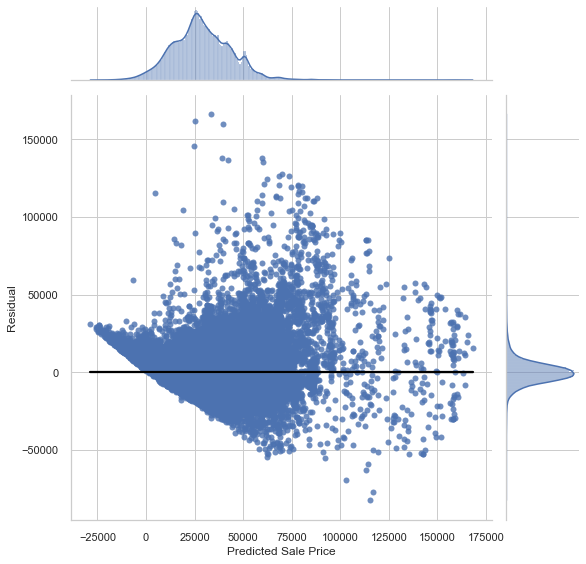

In [43]:
df_reg3 = df_CarYear_Over_2000[['year', 'fuel_economy', 'mileage', 'owner_count', 'savings_amount', \
                               'fuel_tank_volume', 'engine_cylinders', 'daysonmarket', 'horsepower', 'torque', 'seller_rating', 'frame_damaged', \
                               'is_new', 'has_accidents', 'salvage', 'theft_title', 'bt_Convertible', 'bt_Coupe', \
                          'bt_Hatchback', 'bt_Minivan', 'bt_Pickup Truck', 'bt_Unknown', 'bt_Sedan', \
                          'bt_Van','bt_Wagon', 'ft_Biodiesel', 'ft_Compressed Natural Gas', 'ft_Diesel', \
                          'ft_Electric', 'ft_Flex Fuel Vehicle', 'ft_Hybrid', 'lc_BLACK', 'lc_BLUE', 'lc_BROWN', \
                          'lc_GOLD', 'lc_GRAY', 'lc_GREEN','lc_ORANGE', 'lc_PINK', 'lc_PURPLE', 'lc_RED', \
                          'lc_SILVER', 'lc_TEAL', 'lc_UNKNOWN', 'lc_YELLOW', 'td_1-Speed Automatic', \
                          'td_1-Speed CVT', 'td_1-Speed Dual Clutch', 'td_10-Speed Automatic', \
                          'td_2-Speed Automatic', 'td_3-Speed Automatic', 'td_3-Speed Manual', \
                          'td_4-Speed Automatic', 'td_4-Speed Automatic Overdrive', 'td_4-Speed Manual', \
                          'td_5-Speed Automatic', 'td_5-Speed Automatic Overdrive','td_5-Speed Manual', \
                          'td_5-Speed Manual Overdrive','td_6-Speed Automatic', 'td_6-Speed Automatic Overdrive', \
                          'td_6-Speed CVT', 'td_6-Speed Dual Clutch', 'td_6-Speed Manual', \
                          'td_6-Speed Manual Overdrive', 'td_7-Speed Automatic','td_7-Speed Automatic Overdrive', \
                          'td_7-Speed CVT','td_7-Speed Dual Clutch', 'td_7-Speed Manual', 'td_8-Speed Automatic', \
                          'td_8-Speed Automatic Overdrive', 'td_8-Speed CVT','td_8-Speed Dual Clutch', \
                          'td_8-Speed Manual', 'td_9-Speed Automatic','td_9-Speed Automatic Overdrive', \
                          'td_9-Speed Dual Clutch','td_Continuously Variable Transmission', 'td_Manual', \
                          'wsd_4X2', 'wsd_All-Wheel Drive', 'wsd_Four-Wheel Drive','wsd_Rear-Wheel Drive', \
                          'mk_Acura', 'mk_Alfa Romeo', 'mk_Aston Martin', 'mk_Audi', 'mk_BMW', \
                          'mk_Bentley', 'mk_Buick', 'mk_Cadillac', 'mk_Chevrolet', 'mk_Chrysler', \
                          'mk_Dodge', 'mk_FIAT', 'mk_Ferrari', 'mk_Fisker', 'mk_Freightliner', \
                          'mk_GMC', 'mk_Genesis', 'mk_Honda', 'mk_Hummer', 'mk_Hyundai', \
                          'mk_INFINITI', 'mk_Isuzu', 'mk_Jaguar', 'mk_Jeep', 'mk_Karma', 'mk_Kia', \
                          'mk_Lamborghini', 'mk_Land Rover', 'mk_Lexus', 'mk_Lincoln', 'mk_Lotus', \
                          'mk_MINI', 'mk_Maserati', 'mk_Mazda', 'mk_McLaren', 'mk_Mercedes-Benz', \
                          'mk_Mercury', 'mk_Mitsubishi', 'mk_Nissan', 'mk_Oldsmobile', \
                          'mk_Plymouth', 'mk_Pontiac', 'mk_Porsche', 'mk_RAM', 'mk_Rolls-Royce', \
                          'mk_SRT', 'mk_Saab', 'mk_Saturn', 'mk_Scion', 'mk_Subaru', 'mk_Suzuki', \
                          'mk_Tesla', 'mk_Toyota', 'mk_Volkswagen', 'mk_Volvo', 'mk_chevrolet', \
                          'mk_smart']]
df_reg3 = pd.concat([df_reg3, pred3, resid3], axis = 1)
df_reg3 = df_reg3.rename(columns = {0 : 'Predicted Sale Price', 1 : 'Residual'})

plt.figure(figsize=(20,10))
sns.jointplot(x = 'Predicted Sale Price', y = 'Residual', kind = "reg", data = df_reg3, ratio = 5, height = 8, line_kws = {'color':'black'})

In [44]:
corrMatrix = df_reg3.corr()
df_corrMatrix = pd.DataFrame(corrMatrix)

df_corrMatrix

year  fuel_economy  \
year                                   1.000000e+00  1.408478e-01   
fuel_economy                           1.408478e-01  1.000000e+00   
mileage                               -1.726873e-01 -2.598194e-02   
owner_count                           -7.695655e-01 -1.029600e-01   
savings_amount                        -2.444664e-01 -8.603180e-02   
fuel_tank_volume                      -8.433967e-02 -4.398529e-01   
engine_cylinders                      -1.655882e-01 -4.976798e-01   
daysonmarket                          -7.303389e-03 -2.720554e-03   
horsepower                             1.076611e-02 -4.804004e-01   
torque                                 1.771784e-02 -3.329661e-01   
seller_rating                         -8.454129e-02 -4.563941e-02   
frame_damaged                         -9.646136e-02  8.755495e-04   
is_new                                 6.138767e-01  6.936573e-02   
has_accidents                         -3.665653e-01 -3.653523e-02   
salvage                               -1.201172e-01 -1.237850e-02   
theft_title                           -5.680161e-02 -4.837465e-03   
bt_Convertible                        -8.981436e-02 -3.136632e-02   
bt_Coupe                              -7.754302e-02 -4.725967e-02   
bt_Hatchback                          -4.682525e-02  2.686686e-01   
bt_Minivan                            -2.302533e-02 -9.121914e-02   
bt_Pickup Truck                        2.626642e-02 -2.452851e-01   
bt_Unknown                             4.352338e-02  2.524978e-05   
bt_Sedan                              -7.548992e-02  3.183223e-01   
bt_Van                                -4.043984e-04 -2.523630e-02   
bt_Wagon                              -6.330738e-02  1.050142e-01   
ft_Biodiesel                           1.915518e-02 -2.297906e-03   
ft_Compressed Natural Gas             -9.051214e-03  2.805695e-04   
ft_Diesel                             -5.380252e-02  1.037424e-02   
ft_Electric                            1.414794e-02  5.330643e-01   
ft_Flex Fuel Vehicle                  -7.834739e-02 -1.399436e-01   
ft_Hybrid                              1.812177e-02  3.330976e-01   
lc_BLACK                               2.200802e-03 -2.962099e-02   
lc_BLUE                               -1.574763e-02  2.563795e-02   
lc_BROWN                              -9.466477e-02 -1.728519e-02   
lc_GOLD                               -1.142004e-01 -1.639529e-02   
lc_GRAY                                1.957702e-02  4.493402e-02   
lc_GREEN                              -4.678319e-02 -1.061948e-02   
lc_ORANGE                             -1.065051e-03  1.831173e-02   
lc_PINK                               -5.901552e-03 -5.788460e-04   
lc_PURPLE                             -1.838842e-02 -5.558856e-04   
lc_RED                                -1.749842e-02 -5.554633e-03   
lc_SILVER                             -2.853995e-02  2.982926e-02   
lc_TEAL                                6.491029e-03  1.851252e-02   
lc_UNKNOWN                             5.704360e-02 -1.700673e-02   
lc_YELLOW                             -3.243083e-02 -1.715295e-02   
td_1-Speed Automatic                   1.379981e-02  1.156731e-02   
td_1-Speed CVT                         9.948382e-04 -6.061082e-18   
td_1-Speed Dual Clutch                 1.493460e-03  1.104544e-01   
td_10-Speed Automatic                  2.074911e-03 -2.985930e-03   
td_2-Speed Automatic                   7.549724e-03  6.946130e-02   
td_3-Speed Automatic                  -2.120592e-02 -4.490449e-03   
td_3-Speed Manual                     -6.285460e-03  1.042745e-18   
td_4-Speed Automatic                  -2.211194e-01 -5.323547e-02   
td_4-Speed Automatic Overdrive        -1.237284e-01 -1.725026e-04   
td_4-Speed Manual                     -1.187455e-02  1.825135e-17   
td_5-Speed Automatic                  -2.491308e-01 -6.569233e-02   
td_5-Speed Automatic Overdrive        -9.157222e-02 -2.311374e-03   
td_5-Speed Manual                     -9.7452

<AxesSubplot:>

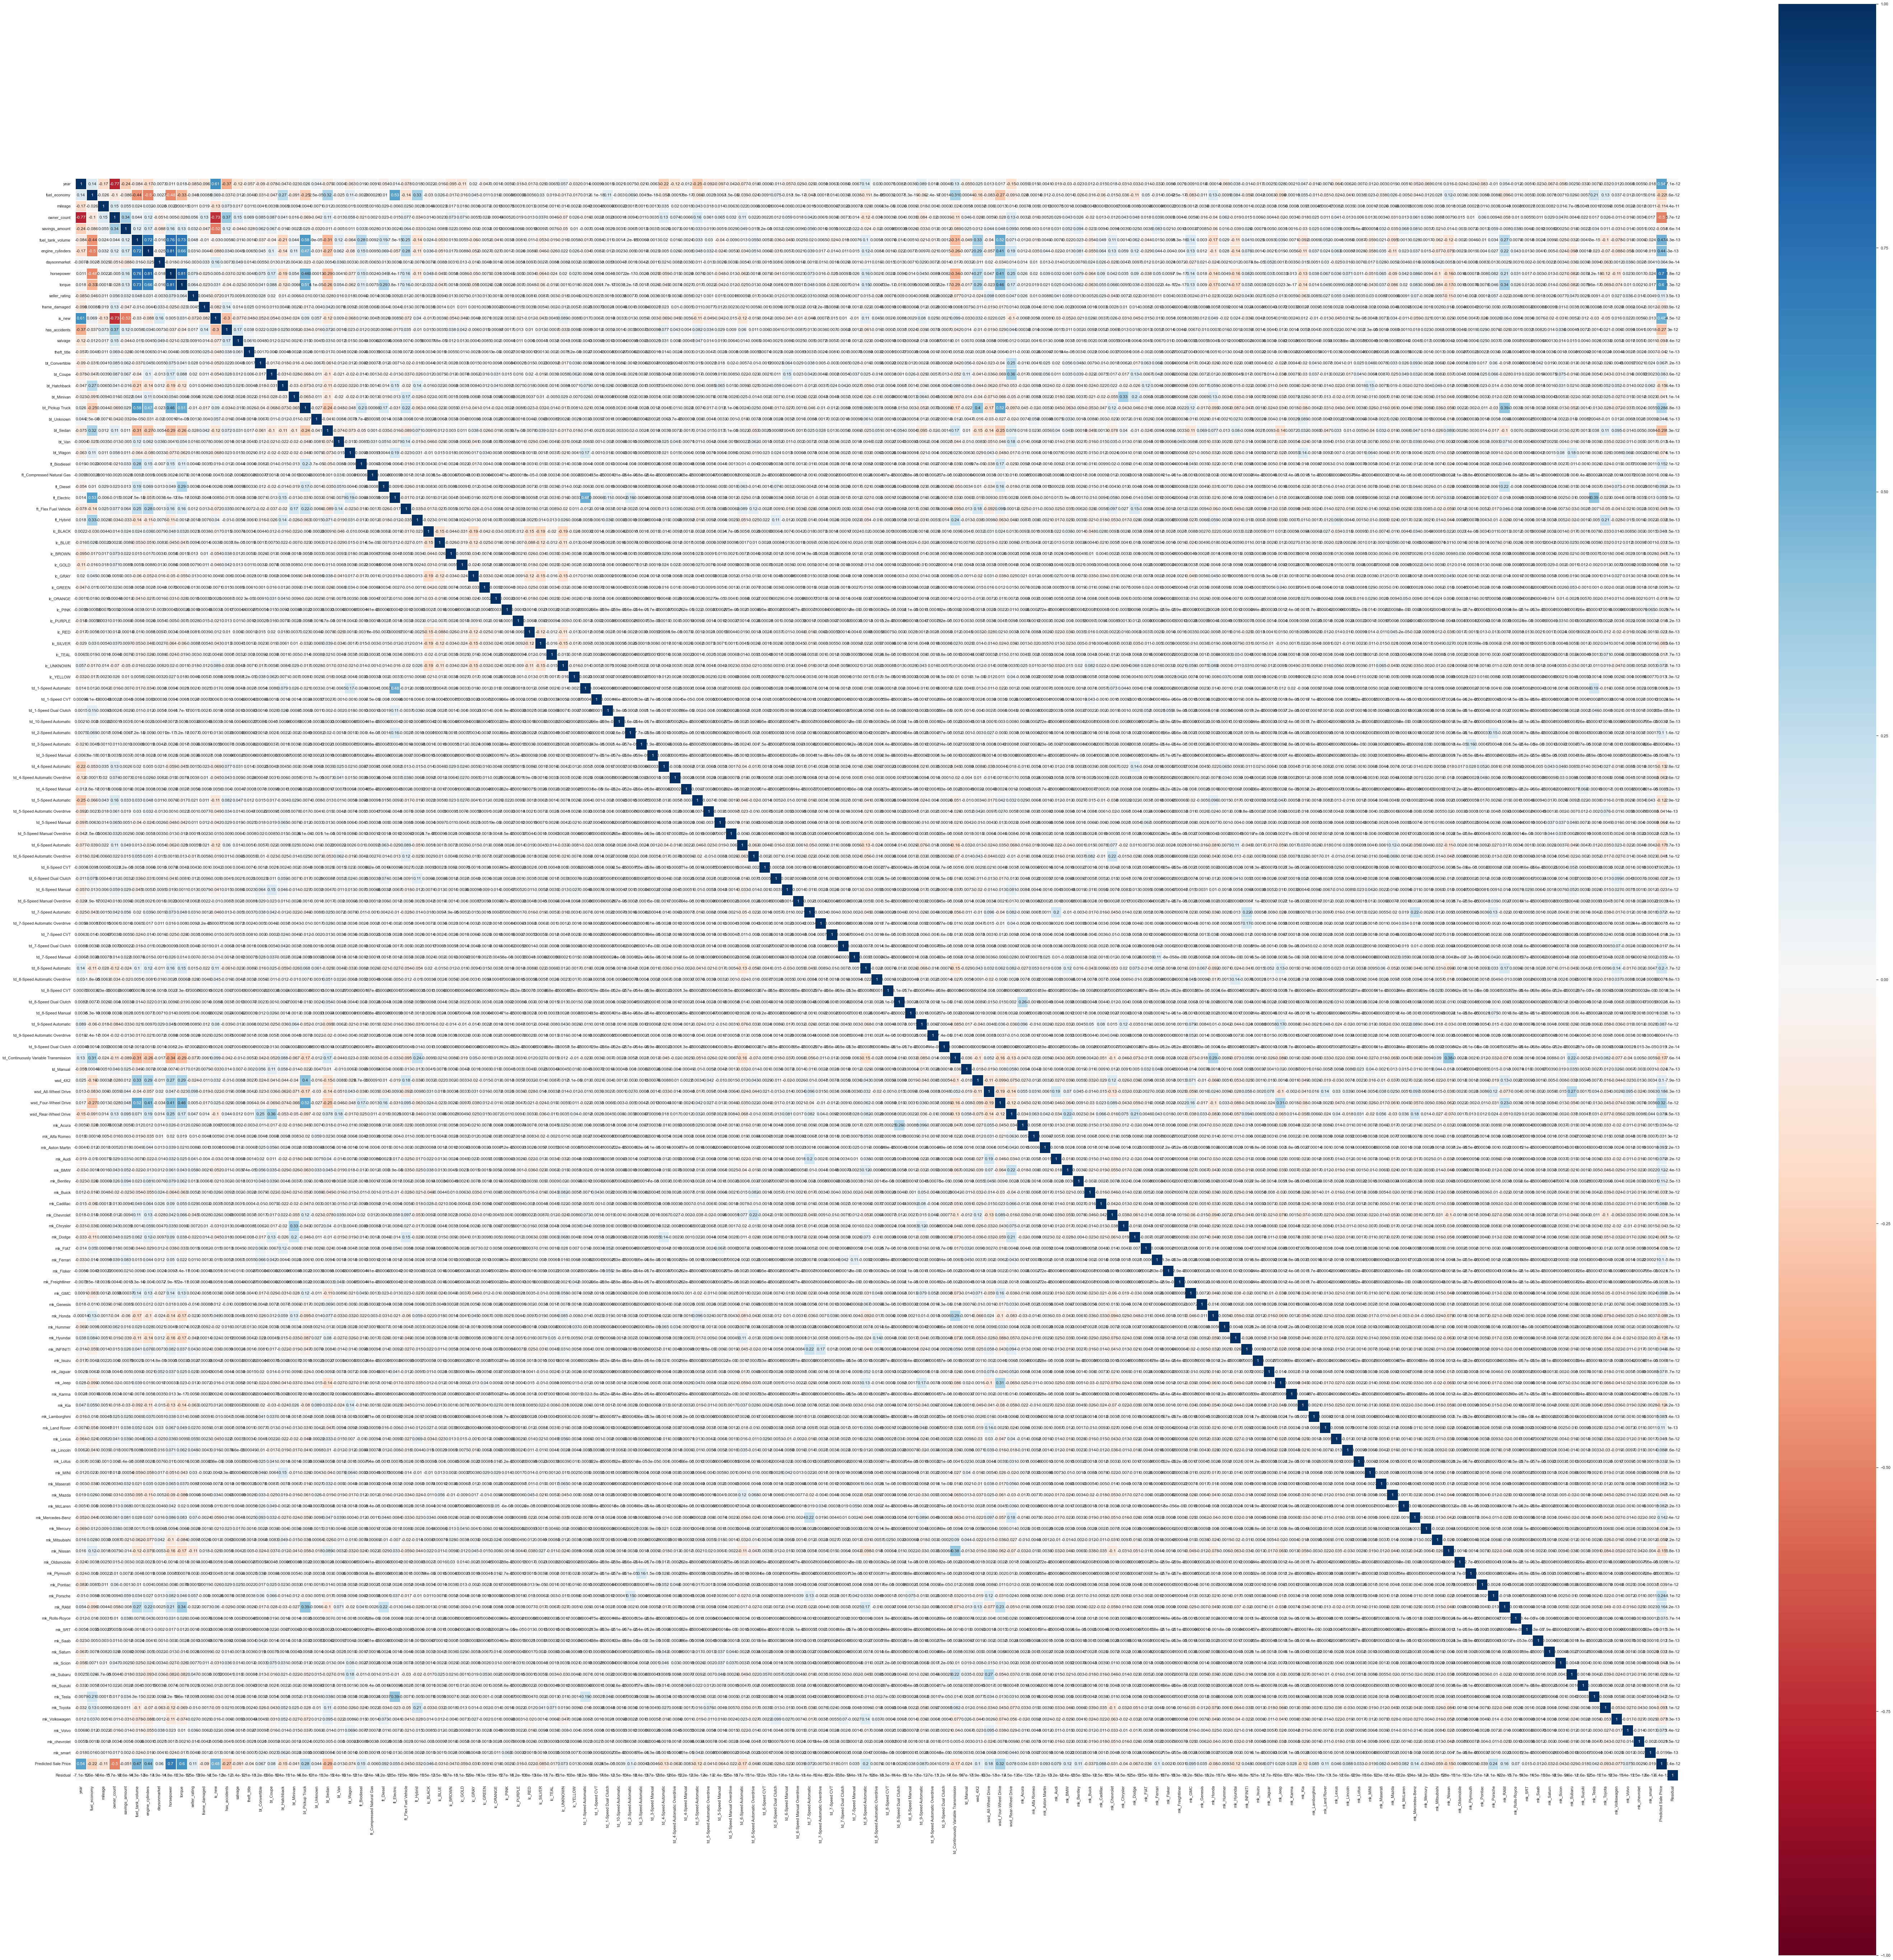

In [45]:
plt.figure(figsize=(100,100))
colormap = plt.cm.RdBu
sns.heatmap(data = df_corrMatrix, linewidths = 0.1, vmax = 1.0, vmin = -1.0, square = True, cmap = colormap, linecolor = 'white', annot = True)

- The heatmap above kind of visualtzes our correlation matrix. We can see that even though our VIF showed no singns of multicollinearity in the model, there are still some few varaibles that are correalated. So in the next regression we are going to base our decision on which varaibles to drop solely on the p-values (i.e. dropping the features with p-values greater than 0.05)

In [46]:
X = df_CarYear_Over_2000[['year', 'fuel_economy', 'mileage', 'owner_count', 'savings_amount', \
    'fuel_tank_volume', 'engine_cylinders', 'daysonmarket', 'horsepower', 'torque', 'seller_rating', \
    'is_new', 'has_accidents', 'theft_title', 'bt_Convertible', 'bt_Coupe', \
    'bt_Minivan', 'bt_Pickup Truck', 'bt_Unknown', 'bt_Sedan', \
    'bt_Wagon', 'ft_Biodiesel', 'ft_Diesel', \
    'ft_Electric', 'ft_Flex Fuel Vehicle', 'ft_Hybrid', 'lc_BLACK', 'lc_BLUE', 'lc_BROWN', \
    'lc_GOLD', 'lc_GREEN', 'lc_RED', \
    'lc_SILVER', 'lc_TEAL', 'lc_UNKNOWN', 'lc_YELLOW', 'td_1-Speed Automatic', \
    'td_2-Speed Automatic', 'td_3-Speed Automatic', \
    'td_4-Speed Automatic', 'td_4-Speed Automatic Overdrive', \
    'td_5-Speed Automatic', 'td_5-Speed Automatic Overdrive','td_5-Speed Manual', \
    'td_5-Speed Manual Overdrive','td_6-Speed Automatic', 'td_6-Speed Automatic Overdrive', \
    'td_6-Speed Manual', \
    'td_7-Speed Automatic','td_7-Speed Automatic Overdrive', \
    'td_7-Speed CVT','td_7-Speed Dual Clutch', 'td_7-Speed Manual', 'td_8-Speed Automatic', \
    'td_8-Speed Automatic Overdrive', \
    'td_8-Speed Manual', 'td_9-Speed Automatic','td_9-Speed Automatic Overdrive', \
    'td_9-Speed Dual Clutch','td_Continuously Variable Transmission', 'td_Manual', \
    'wsd_4X2', 'wsd_All-Wheel Drive', 'wsd_Four-Wheel Drive','wsd_Rear-Wheel Drive', \
    'mk_Acura', 'mk_Alfa Romeo', 'mk_Aston Martin', 'mk_Audi', 'mk_BMW', \
    'mk_Bentley', 'mk_Buick', 'mk_Cadillac', 'mk_Chevrolet', 'mk_Chrysler', \
    'mk_Dodge', 'mk_Ferrari', 'mk_Fisker', \
    'mk_GMC', 'mk_Genesis', 'mk_Honda', 'mk_Hummer', 'mk_Hyundai', \
    'mk_INFINITI', 'mk_Jaguar', 'mk_Jeep', 'mk_Karma', 'mk_Kia', \
    'mk_Lamborghini', 'mk_Land Rover', 'mk_Lexus', 'mk_Lincoln', 'mk_Lotus', \
    'mk_MINI', 'mk_Maserati', 'mk_Mazda', 'mk_McLaren', 'mk_Mercedes-Benz', \
    'mk_Mercury', 'mk_Mitsubishi', 'mk_Nissan', 'mk_Oldsmobile', \
    'mk_Plymouth', 'mk_Pontiac', 'mk_Porsche', 'mk_Rolls-Royce', \
    'mk_SRT', 'mk_Saturn', 'mk_Scion', 'mk_Subaru', 'mk_Suzuki', \
    'mk_Tesla', 'mk_Toyota', 'mk_Volkswagen', 'mk_Volvo', 'mk_chevrolet', \
    'mk_smart']]

y = df_CarYear_Over_2000['price']

In [47]:
X = sm.add_constant(X)

reg4 = sm.OLS(y, X).fit()

pred4 = reg4.predict(X)

resid4 = reg4.resid

reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     5994.
Date:                Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:00:39   Log-Likelihood:            -2.1447e+06
No. Observations:              205248   AIC:                         4.290e+06
Df Residuals:                  205130   BIC:                         4.291e+06
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                 -3.565e+06   1.89e+04   -188.113      0.000    -3.6e+06   -3.53e+06
year                                   1762.9815      9.387    187.810      0.000    1744.583    1781.380
fuel_economy                            -40.2724      5.305     -7.592      0.000     -50.670     -29.875
mileage                                  -0.0005   8.32e-05     -5.816      0.000      -0.001      -0.000
owner_count                            -929.4454     32.341    -28.739      0.000    -992.832    -866.059
savings_amount                            0.3797      0.022     17.176      0.000       0.336       0.423
fuel_tank_volume                         84.7293      7.500     11.297      0.000      70.029      99.430
engine_cylinders                        283.2608     27.082     10.459      0.000     230.180     336.341
daysonmarket                              3.4481      0.183     18.827      0.000       3.089       3.807
horsepower                               90.2980      0.597    151.318      0.000      89.128      91.468
torque                                    5.9624      0.367     16.245      0.000       5.243       6.682
seller_rating                          1441.2081     37.481     38.451      0.000    1367.745    1514.671
is_new                                 6576.4145     63.502    103.562      0.000    6451.952    6700.877
has_accidents                          -912.1946     70.106    -13.012      0.000   -1049.600    -774.789
theft_title                             309.5166    366.517      0.844      0.398    -408.848    1027.882
bt_Convertible                         5786.5019    202.531     28.571      0.000    5389.547    6183.457
bt_Coupe                               1520.9497    133.655     11.380      0.000    1258.989    1782.911
bt_Minivan                            -2301.1641    138.173    -16.654      0.000   -2571.980   -2030.349
bt_Pickup Truck                       -1848.0983     85.358    -21.651      0.000   -2015.398   -1680.799
bt_Unknown                             3103.3871    283.931     10.930      0.000    2546.890    3659.884
bt_Sedan                              -1571.7048     52.610    -29.875      0.000   -1674.819   -1468.590
bt_Wagon                                658.4364    169.666      3.881      0.000     325.896     990.977
ft_Biodiesel                           9523.0092    249.271     38.203      0.000    9034.444       1e+04
ft_Diesel                              9187.6342    184.525     49.791      0.000    8825.970    9549.298
ft_Electric                            5533.9310    475.659     11.634      0.000    4601.652    6466.211
ft_Flex Fuel Vehicle                  -3290.8935     98.125    -33.538      0.000   -3483.217   -3098.570
ft_Hybrid

- Within this regression we decided to drop the variables with relatively high p values.
- We can see that the regression model became more stastically significant as expected; however the R squared value remained the same. Telling us this those particular variables had little to no effect on the overall relationship of the model.

<Figure size 1440x720 with 0 Axes>

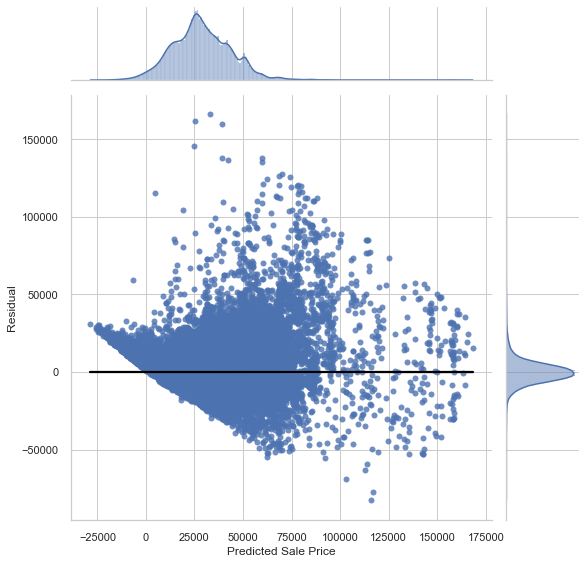

In [48]:
df_reg4 = df_CarYear_Over_2000[['year', 'fuel_economy', 'mileage', 'owner_count', 'savings_amount', \
    'fuel_tank_volume', 'engine_cylinders', 'daysonmarket', 'horsepower', 'torque', 'seller_rating', \
    'is_new', 'has_accidents', 'theft_title', 'bt_Convertible', 'bt_Coupe', \
    'bt_Minivan', 'bt_Pickup Truck', 'bt_Unknown', 'bt_Sedan', \
    'bt_Wagon', 'ft_Biodiesel', 'ft_Diesel', \
    'ft_Electric', 'ft_Flex Fuel Vehicle', 'ft_Hybrid', 'lc_BLACK', 'lc_BLUE', 'lc_BROWN', \
    'lc_GOLD', 'lc_GREEN', 'lc_RED', \
    'lc_SILVER', 'lc_TEAL', 'lc_UNKNOWN', 'lc_YELLOW', 'td_1-Speed Automatic', \
    'td_2-Speed Automatic', 'td_3-Speed Automatic', \
    'td_4-Speed Automatic', 'td_4-Speed Automatic Overdrive', \
    'td_5-Speed Automatic', 'td_5-Speed Automatic Overdrive','td_5-Speed Manual', \
    'td_5-Speed Manual Overdrive','td_6-Speed Automatic', 'td_6-Speed Automatic Overdrive', \
    'td_6-Speed Manual', \
    'td_7-Speed Automatic','td_7-Speed Automatic Overdrive', \
    'td_7-Speed CVT','td_7-Speed Dual Clutch', 'td_7-Speed Manual', 'td_8-Speed Automatic', \
    'td_8-Speed Automatic Overdrive', \
    'td_8-Speed Manual', 'td_9-Speed Automatic','td_9-Speed Automatic Overdrive', \
    'td_9-Speed Dual Clutch','td_Continuously Variable Transmission', 'td_Manual', \
    'wsd_4X2', 'wsd_All-Wheel Drive', 'wsd_Four-Wheel Drive','wsd_Rear-Wheel Drive', \
    'mk_Acura', 'mk_Alfa Romeo', 'mk_Aston Martin', 'mk_Audi', 'mk_BMW', \
    'mk_Bentley', 'mk_Buick', 'mk_Cadillac', 'mk_Chevrolet', 'mk_Chrysler', \
    'mk_Dodge', 'mk_Ferrari', 'mk_Fisker', \
    'mk_GMC', 'mk_Genesis', 'mk_Honda', 'mk_Hummer', 'mk_Hyundai', \
    'mk_INFINITI', 'mk_Jaguar', 'mk_Jeep', 'mk_Karma', 'mk_Kia', \
    'mk_Lamborghini', 'mk_Land Rover', 'mk_Lexus', 'mk_Lincoln', 'mk_Lotus', \
    'mk_MINI', 'mk_Maserati', 'mk_Mazda', 'mk_McLaren', 'mk_Mercedes-Benz', \
    'mk_Mercury', 'mk_Mitsubishi', 'mk_Nissan', 'mk_Oldsmobile', \
    'mk_Plymouth', 'mk_Pontiac', 'mk_Porsche', 'mk_Rolls-Royce', \
    'mk_SRT', 'mk_Saturn', 'mk_Scion', 'mk_Subaru', 'mk_Suzuki', \
    'mk_Tesla', 'mk_Toyota', 'mk_Volkswagen', 'mk_Volvo', 'mk_chevrolet', \
    'mk_smart']]

df_reg4 = pd.concat([df_reg4, pred4, resid4], axis = 1)
df_reg4 = df_reg4.rename(columns = {0 : 'Predicted Sale Price', 1 : 'Residual'})

plt.figure(figsize=(20,10))
sns.jointplot(x = 'Predicted Sale Price', y = 'Residual', kind = "reg", data = df_reg4, ratio = 5, height = 8, line_kws = {'color':'black'})

-  In this joint plot, we look to identify the relationship between the residuals and the predicted Sale Price.
- In comparison to the first jointplot this analysis includes the label encoded variablea and has high p values dropped.
- We see the model is cleaner in less outliers and a vast majority of points falling near the line (low variability & high consistency}.

## Section 6: Summary

#### Data Cleaning
- Part of our initial process was to filter our data set by year and sale price to identify any outliers that we would need to drop from our dataset. Part of our reasoning for filtering by sale price was taking the average consumer into mind to identify the price range that would best fit our analysis. 

- We filled in NaN variables and missing variables to so our data set would be useable when running a regression model. As well, we engineered feature variables that were correlated so it would be represented in our regression models while reducing any issues associated with multicolinearity.  

#### Methodology
- We ran different multiple regression models to check the signifiance of variables we used in our models. Based off the p-values of these variables and our highest VIF factor of 8.4 for horsepower, we dropped several of these variables which are not significant to our analysis to increase the strength of our model. 

- The residual plots improved when we dropped the insignificant variables from our regression models.

- We also saw there was a positive correlation between year and sale price based off the regression fit plot we ran.

#### Conclusions
- Looking at our final regression model, our r-squared value improved significantly over our initial model. Based off the parameters for our final regression, we can use this model to predict the final sale price of various cars in the car market. 